<a href="https://colab.research.google.com/github/PimpatcharaCh/229351-StatisticalLearning/blob/main/229351_LAB03_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ปฏิบัติการครั้งที่ 3 กระบวนวิชา 229351 Statistical Learning for Data Science

คำชี้แจง

1. ให้เริ่มทำปฏิบัติการจาก colab notebook ที่กำหนดให้ จากนั้นบันทึกเป็นไฟล์ *.pdf

### ในปฏิบัติการนี้เราจะฝึกการทำ PCA ด้วยสองวิธี คือ
1. หาด้วยการแยกส่วนประกอบของเมทริกซ์ผ่าน numpy
2. หาด้วยการใช้เครื่องมือที่มีมาให้ใน scikit-learn

ดาวน์โหลดข้อมูลสัตว์ต่างๆ 50 ชนิดดังนี้  
ชนิดสัตว์: https://donlapark.pages.dev/229351/data/classes.txt  
ตัวแปรต่างๆ: https://donlapark.pages.dev/229351/data/predicates.txt  
ค่าของสัตว์แต่ละชนิด: https://donlapark.pages.dev/229351/data/predicate-matrix-continuous.txt

In [1]:
!pip install -q wget

import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

  Preparing metadata (setup.py) ... done


In [2]:
# Download the files
!wget -O classes.txt https://donlapark.pages.dev/229351/data/classes.txt
!wget -O predicate-matrix-continuous.txt https://donlapark.pages.dev/229351/data/predicate-matrix-continuous.txt

--2025-07-29 16:45:44--  https://donlapark.pages.dev/229351/data/classes.txt
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.47.56, 172.66.44.200, 2606:4700:310c::ac42:2cc8, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.47.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 755 [text/plain]
Saving to: ‘classes.txt’

classes.txt         100%[===================>]     755  --.-KB/s    in 0s      

2025-07-29 16:45:44 (10.8 MB/s) - ‘classes.txt’ saved [755/755]

--2025-07-29 16:45:44--  https://donlapark.pages.dev/229351/data/predicate-matrix-continuous.txt
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.47.56, 172.66.44.200, 2606:4700:310c::ac42:2cc8, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.47.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29800 (29K) [text/plain]
Saving to: ‘predicate-matrix-continuous.txt’

predicate-matrix-co 100%[===================>]  29

In [3]:
classes = np.genfromtxt('classes.txt',dtype='str')

classes[:5]

array([['1', 'antelope'],
       ['2', 'grizzly+bear'],
       ['3', 'killer+whale'],
       ['4', 'beaver'],
       ['5', 'dalmatian']], dtype='<U15')

In [4]:
data = np.genfromtxt('predicate-matrix-continuous.txt')

data[:5,:5]

array([[-1.  , -1.  , -1.  , -1.  , 12.34],
       [39.25,  1.39,  0.  , 74.14,  3.75],
       [83.4 , 64.79,  0.  ,  0.  ,  1.25],
       [19.38,  0.  ,  0.  , 87.81,  7.5 ],
       [69.58, 73.33,  0.  ,  6.39,  0.  ]])

#### Exercise 1

ใน code block ข้างล่างนี้ จงทำ PCA บนข้อมูลที่ได้มาให้เหลือเมทริกซ์ข้อมูลที่มีตัวแปรแค่ 2 ตัว โดยใช้ฟังก์ชัน $\texttt{np.linalg.eigh}$  
ดังนั้น เมทริกซ์ที่ได้ต้องมีขนาด 50x2

$$ \Sigma =
  \begin{pmatrix}
\text{var}(X_1) & \text{cov}(X_1,X_2) & \cdots & \text{cov}(X_1,X_{85}) \\
\text{cov}(X_2,X_1) & \text{var}(X_2) & \cdots & \text{cov}(X_2,X_{85}) \\
\vdots & \vdots & \ddots & \vdots \\
\text{cov}(X_{85},X_1) & \text{cov}(X_{85},X_1) & \cdots & \text{var}(X_{85}) \\
\end{pmatrix}
 $$

In [5]:
# TODO: enter code here
np.random.seed(0)
data = np.random.rand(50, 85)

# 1. Center ข้อมูล สมมติว่า data_c คือ normalized (centered) data
data_c = data - np.mean(data, axis=0)

# 2. หา covariance matrix
cov_matrix = np.cov(data_c, rowvar=False)

# 3. Decompose the covariance matrix UDU^T
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# 4. ดึง column ของ U ที่ประกอบไปด้วย eigenvector สองตัวที่มีค่า eigenvalue สูงที่สุด
top_indices = np.argsort(eigenvalues)[-2:][::-1]
top_eigenvectors = eigenvectors[:, top_indices]

# 5. เอา data_c ไปทำ projection ทิศทางของ eigenvector ใน U
reduced_data = np.dot(data_c, top_eigenvectors)

# Result: a (50,2) matrix
print(reduced_data.shape)

(50, 2)


#### OPTIONAL

ใน code block ข้างล่างนี้ จงทำ PCA บนข้อมูลที่ได้มาให้เหลือเมทริกซ์ข้อมูลที่มีตัวแปรแค่ 2 ตัว โดยใช้ $scikit-learn$  
พร้อมกับตรวจสอบว่าเมทริกซ์ที่ได้จากทั้งสองวิธีนี้มีค่าเท่ากัน (ต่างกันแค่ค่าบวกลบ)

In [10]:
#TODO (optional): enter code here
pca = PCA(n_components=2)
reduced_sklearn = pca.fit_transform(data)

comparison = np.allclose(np.abs(reduced_eigh), np.abs(reduced_sklearn), atol=1.e-5)
print(comparison)

True


#### Exercise 2

ทำการพล็อตจุดของข้อมูลที่ได้จาก PCA ข้างบนพร้อมกับใส่คำกำกับว่าจุดไหนเป็นของสัตว์ชนิดใดโดยใช้ชื่อสัตว์จาก classes.txt

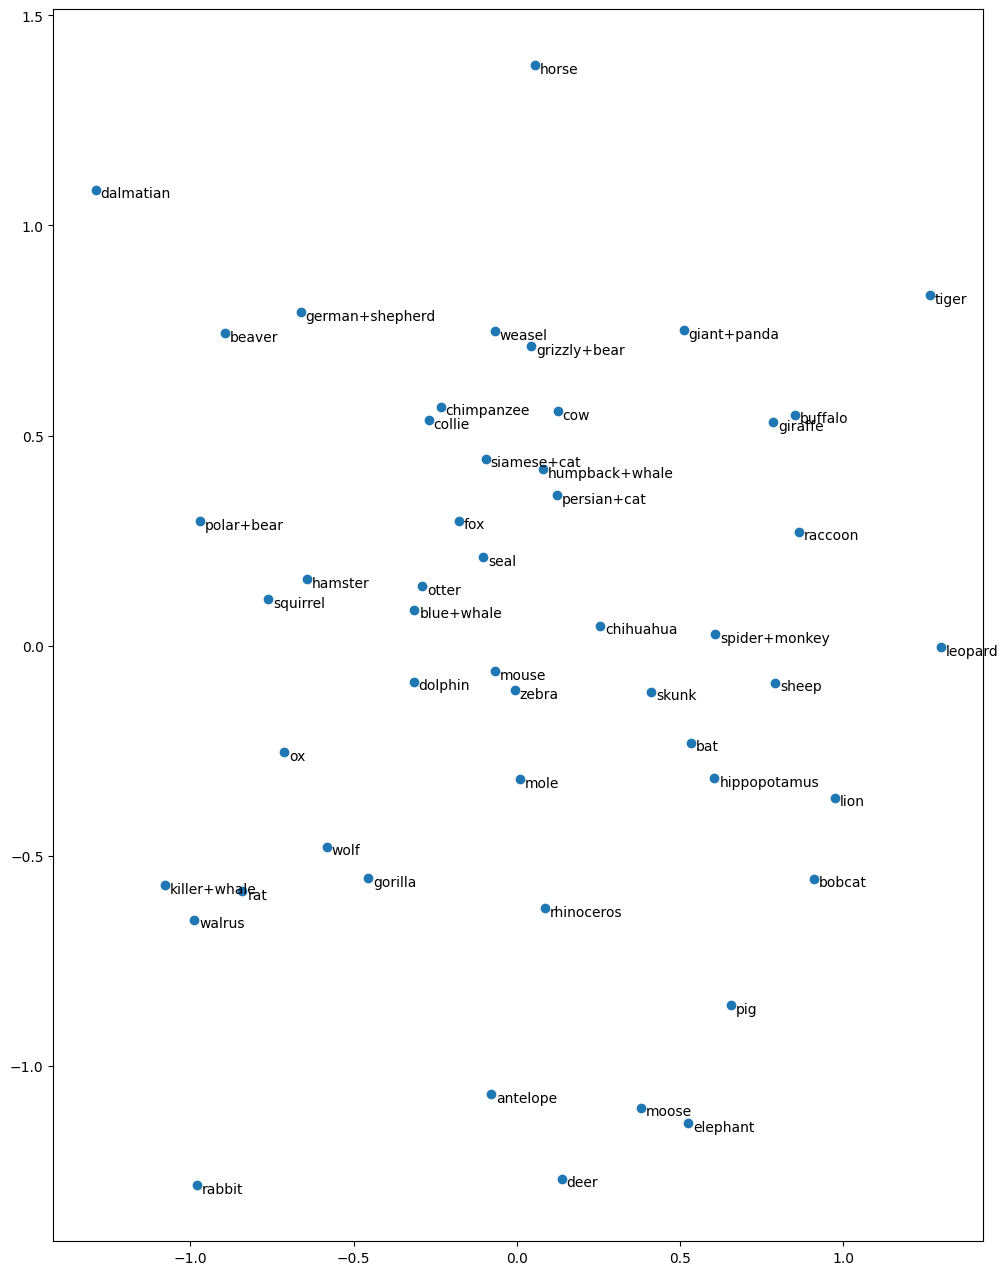

In [12]:
# กำหนดขนาดของรูป
plt.figure(figsize=(12,16))

# จงเติม argument ที่เหมาะสมในวงเล็บข้างล่างนี้
# รูปแบบของฟังก์ชันคือ plt.scatter(numpy array ของ x-coordinate, numpy array ของ y-coordinate)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1]) #TODO: 1st column of your 50x2 matrix, #TODO: 2nd column of your 50x2 matrix )

# for loop เพื่อใส่คำกำกับ (annotate) ชื่อสัตว์ของแต่ละจุด วนให้ครบสัตว์ทุกชนิดที่อยู่ใน classes
# ใส่ numpy array ที่ผ่านการทำ PCA แล้วลงในตำแหน่งที่ระบุเพื่อบอกพิกัดที่ต้องวางคำกำกับ

animal_names = []
with open("classes.txt", "r") as f:
    for line in f:
        parts = line.strip().split('\t')
        if len(parts) == 2:
            name = parts[1].replace('+', ' ')
            animal_names.append(name)

data = np.loadtxt("predicate-matrix-continuous.txt")

for i in range(50):
  plt.annotate(
          classes[i,1],
          xy=(reduced_data[i, 0],
              reduced_data[i, 1]),
              xytext=(5, -8),
              textcoords='offset pixels')

plt.show()

#### Exercise 3

หากลุ่มสัตว์ต่างๆ ที่อยู่ใกล้กันมา 4 กลุ่ม แล้วลองอธิบายว่าสัตว์ในแต่ละกลุ่มมีอะไรที่เหมือนกัน

1.กลุ่มสัตว์ที่มุมขวาบน มีลักษณะที่เหมือนกันคือ มีความคล่องตัวสูง มีประสาทสัมผัสดี มีความสามารถในการเรียนรู้

2.กลุ่มสัตว์ที่มุมซ้ายบน มีลักษณะที่เหมือนกันคือ สัตว์บกขนาดกลางถึงใหญ่ มีพลังในการเคลื่อนไหว

3.กลุ่มสัตว์ที่มุมขวาล่าง มีลักษณะที่เหมือนกันคือ สัตว์ที่เคลื่อนไหวเร็ว มีพฤติกรรมคล่องแคล่ว

4.กลุ่มสัตว์ที่มุมซ้ายล่าง มีลักษณะที่เหมือนกันคือ สัตว์ขนาดเล็กถึงกลาง มีพฤติกรรมเฉพาะตัว